In [1]:
import pandas as pd
df = pd.read_csv('marketing_campaign_dataset.csv')
df.shape

(200000, 16)

In [2]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [3]:
df.tail()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10
199999,200000,Innovate Industries,Social Media,Women 35-44,45 days,Google Ads,0.01,"$13,835.00",6.64,Chicago,Spanish,924,7287,8,Tech Enthusiasts,2021-12-11


In [4]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [6]:
df['Acquisition_Cost'].head()

0    $16,174.00
1    $11,566.00
2    $10,200.00
3    $12,724.00
4    $16,452.00
Name: Acquisition_Cost, dtype: object

In [7]:
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

In [8]:
total_acquisition_cost = df['Acquisition_Cost'].sum()
print("총 고객 획득 비용:", total_acquisition_cost)

총 고객 획득 비용: 2500878608.0


In [9]:
channel_acquisition_cost = df.groupby('Channel_Used')['Acquisition_Cost'].sum()
print("채널별 고객 획득 비용:")
print(channel_acquisition_cost)

채널별 고객 획득 비용:
Channel_Used
Email         420874104.0
Facebook      410595258.0
Google Ads    418912314.0
Instagram     417124850.0
Website       416593500.0
YouTube       416778582.0
Name: Acquisition_Cost, dtype: float64


In [10]:
channel_acquisition_cost.to_csv('channel_acquisition_cost.csv')

In [11]:
channel_conversion_rate = df.groupby('Channel_Used')['Conversion_Rate'].mean()
print("채널별 평균 구매 전환율:")
print(channel_conversion_rate)

채널별 평균 구매 전환율:
Channel_Used
Email         0.080282
Facebook      0.079992
Google Ads    0.080183
Instagram     0.079886
Website       0.080183
YouTube       0.079889
Name: Conversion_Rate, dtype: float64


In [12]:
channel_conversion_rate.to_csv('channel_conversion_rate.csv')

In [13]:
audience_conversion_rate = df.groupby('Target_Audience')['Conversion_Rate'].mean()
print("타깃 고객 그룹별 평균 구매 전환율:")
print(audience_conversion_rate)

타깃 고객 그룹별 평균 구매 전환율:
Target_Audience
All Ages       0.079975
Men 18-24      0.080240
Men 25-34      0.080132
Women 25-34    0.079899
Women 35-44    0.080102
Name: Conversion_Rate, dtype: float64


In [14]:
audience_conversion_rate.to_csv('audience_conversion_rate.csv')

In [15]:
duration_conversion_rate = df.groupby('Duration')['Conversion_Rate'].mean()
print("캠페인 기간별 평균 구매 전환율:")
print(duration_conversion_rate)

캠페인 기간별 평균 구매 전환율:
Duration
15 days    0.080101
30 days    0.080177
45 days    0.079952
60 days    0.080048
Name: Conversion_Rate, dtype: float64


In [16]:
duration_conversion_rate.to_csv('duration_conversion_rate.csv')

In [17]:
location_acquisition_cost = df.groupby('Location')['Acquisition_Cost'].sum()
print("지역별 고객 획득 비용:")
print(location_acquisition_cost)

지역별 고객 획득 비용:
Location
Chicago        500731615.0
Houston        495061893.0
Los Angeles    500637366.0
Miami          503974911.0
New York       500472823.0
Name: Acquisition_Cost, dtype: float64


In [18]:
location_acquisition_cost.to_csv('location_acquisition_cost.csv')

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('marketing_campaign_dataset.csv')
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

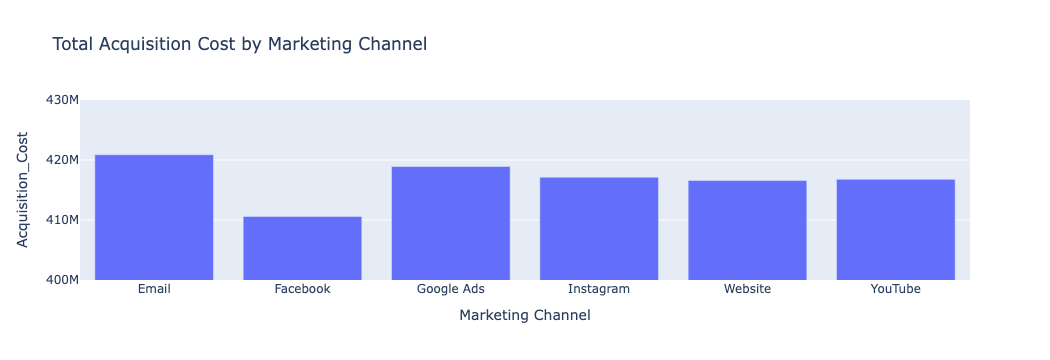

In [2]:
channel_acquisition_cost = df.groupby('Channel_Used')['Acquisition_Cost'].sum().reset_index()

fig = px.bar(
    channel_acquisition_cost,
    x='Channel_Used',
    y='Acquisition_Cost',
    title='Total Acquisition Cost by Marketing Channel',
    labels={'Channel_Used': 'Marketing Channel', 'Acqusition_Cost': 'Total Acquisition Cost'}
)
fig.update_yaxes(range=[400000000, 430000000])
fig.show()

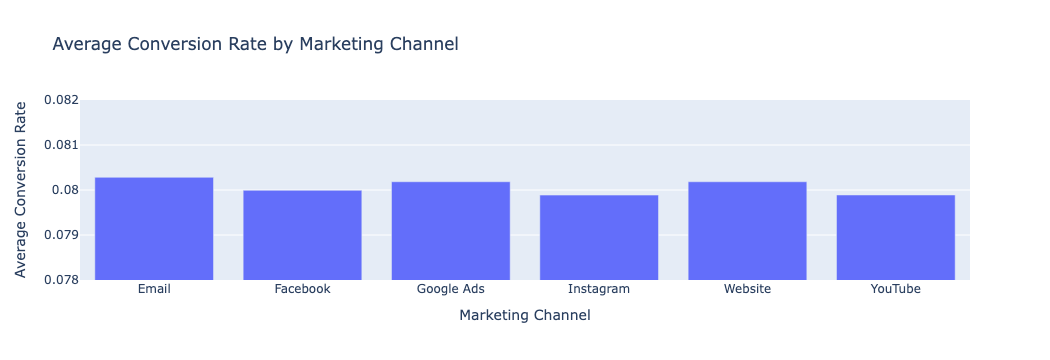

In [3]:
channel_conversion_rate = df.groupby('Channel_Used')['Conversion_Rate'].mean().reset_index()

fig = px.bar(
    channel_conversion_rate,
    x='Channel_Used',
    y='Conversion_Rate',
    title='Average Conversion Rate by Marketing Channel',
    labels={'Channel_Used': 'Marketing Channel', 'Conversion_Rate': 'Average Conversion Rate'}
)
fig.update_yaxes(range=[0.078, 0.082])
fig.show()

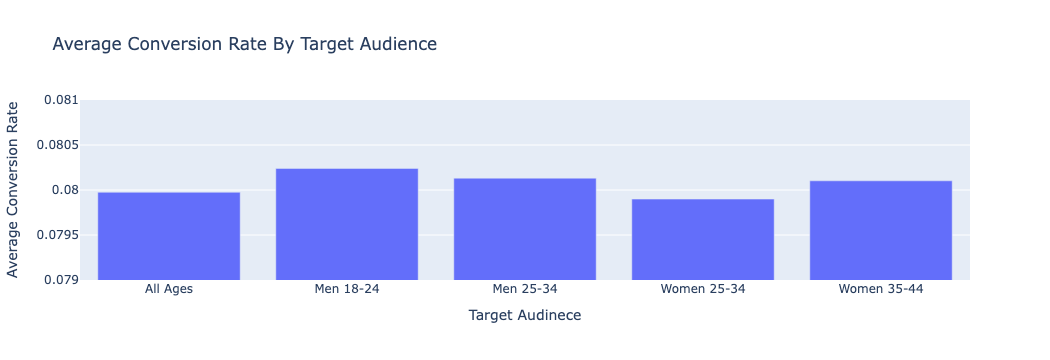

In [5]:
audience_conversion_rate = df.groupby('Target_Audience')['Conversion_Rate'].mean().reset_index()

fig = px.bar(
    audience_conversion_rate,
    x='Target_Audience',
    y='Conversion_Rate',
    title='Average Conversion Rate By Target Audience',
    labels={'Target_Audience': 'Target Audinece', 'Conversion_Rate': 'Average Conversion Rate'}
)

fig.update_yaxes(range=[0.079, 0.081])
fig.show()

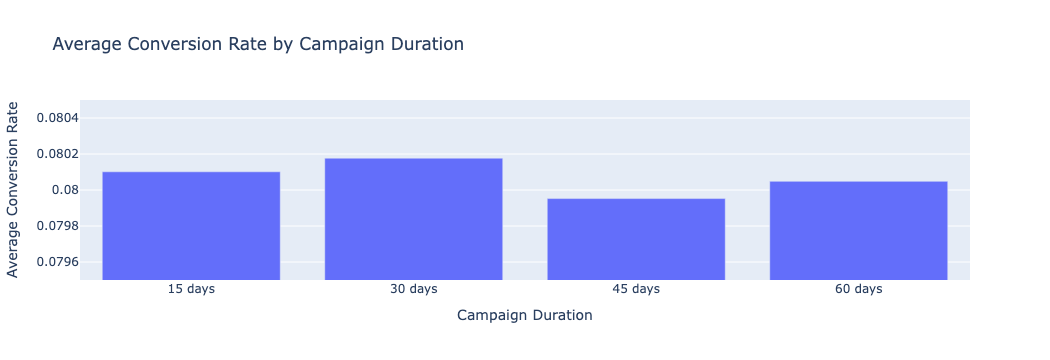

In [7]:
duration_conversion_rate = df.groupby('Duration')['Conversion_Rate'].mean().reset_index()

fig = px.bar(
    duration_conversion_rate,
    x='Duration',
    y='Conversion_Rate',
    title='Average Conversion Rate by Campaign Duration',
    labels={'Duration': 'Campaign Duration', 'Conversion_Rate': 'Average Conversion Rate'}
)

fig.update_yaxes(range=[0.0795, 0.0805])
fig.show()

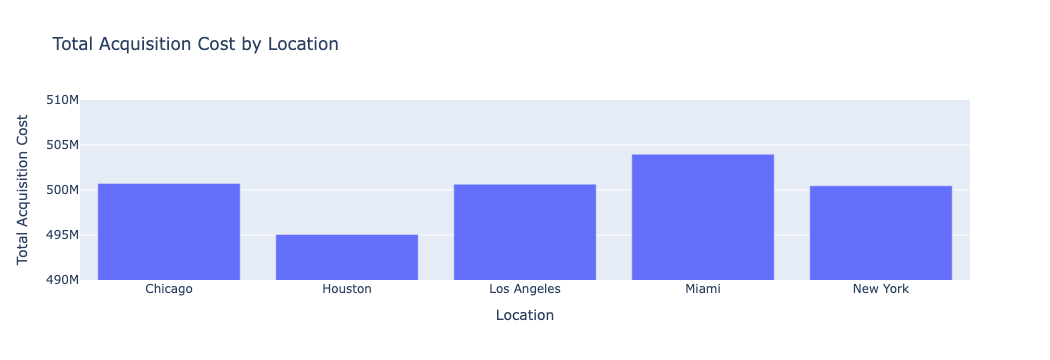

In [8]:
location_acquisition_cost = df.groupby('Location')['Acquisition_Cost'].sum().reset_index()

fig = px.bar(
    location_acquisition_cost,
    x='Location',
    y='Acquisition_Cost',
    title='Total Acquisition Cost by Location',
    labels={'Location': 'Location', 'Acquisition_Cost': 'Total Acquisition Cost'}
)

fig.update_yaxes(range=[490000000, 510000000])
fig.show()

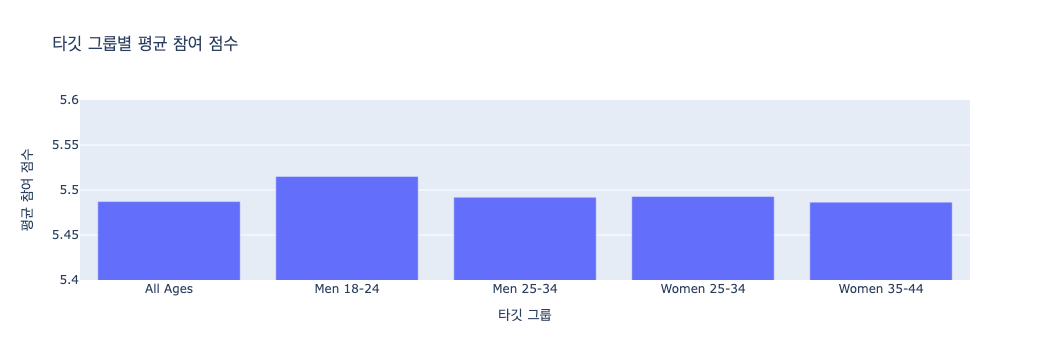

In [13]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('marketing_campaign_dataset.csv')
df.head()

target_group = df.groupby('Target_Audience')['Engagement_Score'].mean().reset_index()

fig = px.bar(
    target_group,
    x='Target_Audience',
    y='Engagement_Score',
    title='타깃 그룹별 평균 참여 점수',
    labels={'Target_Audience': '타깃 그룹', 'Engagement_Score': '평균 참여 점수'}
)

fig.update_yaxes(range=[5.4,5.6])
fig.show()

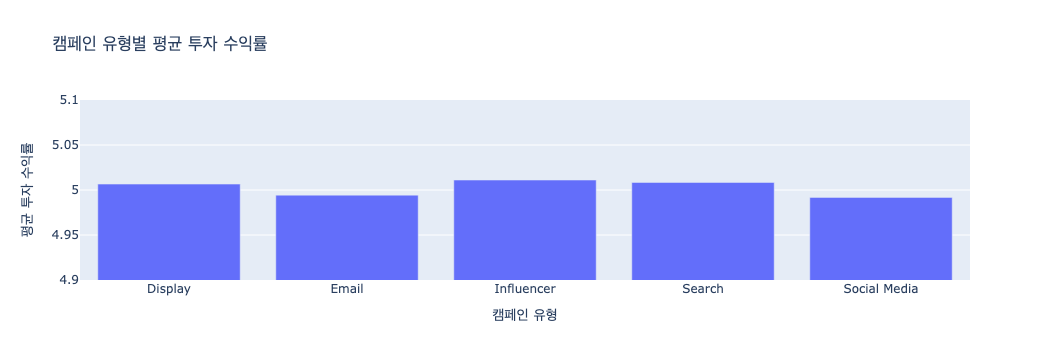

In [16]:
champaign_group = df.groupby('Campaign_Type')['ROI'].mean().reset_index()

fig = px.bar(
    champaign_group,
    x='Campaign_Type',
    y='ROI',
    title='캠페인 유형별 평균 투자 수익률',
    labels={'Campaign_Type': '캠페인 유형', 'ROI': '평균 투자 수익률'}
)
fig.update_yaxes(range=[4.9, 5.1])
fig.show()
    